In [95]:
# import all libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

In [74]:
# load and store excel as a DataFrame
df_stockdata = pd.read_excel('KmeansStockData.xlsx',parse_dates=[1], index_col=[0])
df_stockdata = df_stockdata[21:]
df_stockdata.head()

,Stock1,Stock2,simplereturn_stock1,simplereturn_stock2,simplereturn_var_stock1,simplereturn_var_stock2,simplereturn_covar,simplereturn_vol_stock1,simplereturn_vol_stock2,correlation
Date,,,,,,,,,,
2015-02-19,43.500000,163.889999,-0.000689,0.010482,0.000724,0.000221,0.000243,0.026913,0.014858,0.607135
2015-02-20,43.860001,163.649994,0.008276,-0.001464,0.000721,0.000164,0.000231,0.026861,0.012803,0.671010
2015-02-23,44.150002,162.910004,0.006612,-0.004522,0.000683,0.000147,0.000201,0.026139,0.012131,0.634709
2015-02-24,44.090000,164.830002,-0.001359,0.011786,0.000687,0.000150,0.000198,0.026216,0.012236,0.616408
2015-02-25,43.990002,162.809998,-0.002268,-0.012255,0.000687,0.000154,0.000198,0.026218,0.012419,0.609557


In [68]:
# MinMax each feature and save it as X
features = ['simplereturn_var_stock1',
            'simplereturn_var_stock2',
            'simplereturn_covar']

X = df_stockdata.copy()[features]
scaler = MinMaxScaler()

X[features] = scaler.fit_transform(X[features])
X.head()

,simplereturn_var_stock1,simplereturn_var_stock2,simplereturn_covar
Date,,,
2015-02-19,0.860653,0.274073,0.495628
2015-02-20,0.857245,0.196697,0.475031
2015-02-23,0.810855,0.173875,0.424431
2015-02-24,0.815778,0.177354,0.418379
2015-02-25,0.815902,0.183505,0.419658


# K-means

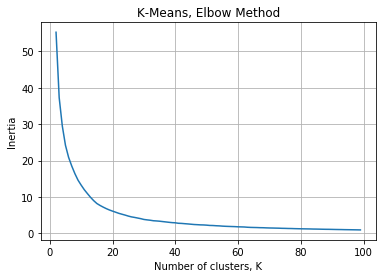

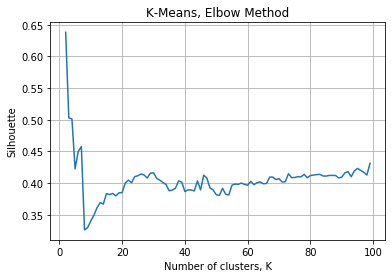

In [70]:
# trying out different K (from 2 to 100) and drawing out the elbow curves
inertias = {}
silhouettes = {}
for k in range(2, 100):
    kmeans = KMeans(init='k-means++', n_init=100, n_clusters=k, max_iter=1000, random_state=42).fit(X)
    inertias[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    silhouettes[k] = silhouette_score(X, kmeans.labels_)

plt.figure()
plt.grid(True)
plt.plot(list(inertias.keys()), list(inertias.values()))
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K")
plt.ylabel("Inertia")

plt.figure();
plt.grid(True);
plt.plot(list(silhouettes.keys()), list(silhouettes.values()))
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K")
plt.ylabel("Silhouette")

plt.show()

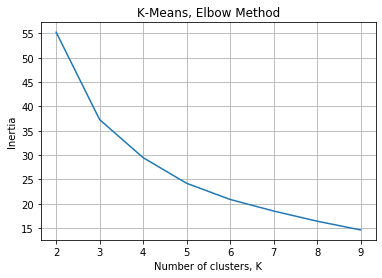

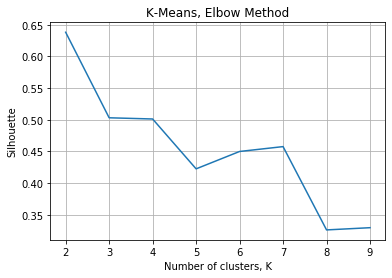

In [71]:
# trying out different K (from 2 to 10) and drawing out the elbow curves
inertias = {}
silhouettes = {}
for k in range(2, 10):
    kmeans = KMeans(init='k-means++', n_init=100, n_clusters=k, max_iter=1000, random_state=42).fit(X)
    inertias[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    silhouettes[k] = silhouette_score(X, kmeans.labels_)

plt.figure()
plt.grid(True)
plt.plot(list(inertias.keys()), list(inertias.values()))
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K")
plt.ylabel("Inertia")

plt.figure();
plt.grid(True);
plt.plot(list(silhouettes.keys()), list(silhouettes.values()))
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K")
plt.ylabel("Silhouette")

plt.show()

In [75]:
# choose cluster = 4 since it has the same Silhouette score but has less inertia than 3 clusters
kmeans = KMeans(init='k-means++', n_init=100, n_clusters=4, max_iter=1000, random_state=42).fit(X)
kmeans.fit(X)
df_stockdata['KMeans_clusters'] = kmeans.labels_
df_stockdata.head()

,Stock1,Stock2,simplereturn_stock1,simplereturn_stock2,simplereturn_var_stock1,simplereturn_var_stock2,simplereturn_covar,simplereturn_vol_stock1,simplereturn_vol_stock2,correlation,KMeans_clusters
Date,,,,,,,,,,,
2015-02-19,43.500000,163.889999,-0.000689,0.010482,0.000724,0.000221,0.000243,0.026913,0.014858,0.607135,3
2015-02-20,43.860001,163.649994,0.008276,-0.001464,0.000721,0.000164,0.000231,0.026861,0.012803,0.671010,3
2015-02-23,44.150002,162.910004,0.006612,-0.004522,0.000683,0.000147,0.000201,0.026139,0.012131,0.634709,3
2015-02-24,44.090000,164.830002,-0.001359,0.011786,0.000687,0.000150,0.000198,0.026216,0.012236,0.616408,3
2015-02-25,43.990002,162.809998,-0.002268,-0.012255,0.000687,0.000154,0.000198,0.026218,0.012419,0.609557,3


In [79]:
# trim other features but var and covar
df_stockdata_trimed = df_stockdata[features+['KMeans_clusters']]
df_stockdata_trimed.head()

,simplereturn_var_stock1,simplereturn_var_stock2,simplereturn_covar,KMeans_clusters
Date,,,,
2015-02-19,0.000724,0.000221,0.000243,3
2015-02-20,0.000721,0.000164,0.000231,3
2015-02-23,0.000683,0.000147,0.000201,3
2015-02-24,0.000687,0.000150,0.000198,3
2015-02-25,0.000687,0.000154,0.000198,3


In [104]:
# finding out the feature means of each K-Means cluster and display its % and print out its silhouette_score
alg = 'KMeans_clusters'
a = df_stockdata_trimed.groupby(alg).count()[['simplereturn_var_stock1']]*100/df_stockdata_trimed.shape[0]
a.columns = ['%']
b = df_stockdata_trimed.groupby(alg).mean()[features]
c = b.join(a)
print(silhouette_score(X, kmeans.labels_))
c = c.sort_values(by='simplereturn_covar')
c

0.5011780689315015


,simplereturn_var_stock1,simplereturn_var_stock2,simplereturn_covar,%
KMeans_clusters,,,,
2,0.000106,0.000083,0.000031,60.985460
1,0.000234,0.000273,0.000114,23.667205
3,0.000583,0.000287,0.000158,7.350565
0,0.000652,0.000403,0.000372,7.996769


In [105]:
# assemble clusters_report dataframe
c['volatility_stock1'] = np.sqrt(c.simplereturn_var_stock1)
c['volatility_stock2'] = np.sqrt(c.simplereturn_var_stock2)
c['correlation'] = c.simplereturn_covar / (c.volatility_stock1*c.volatility_stock2)
clusters_report = c[['volatility_stock1','volatility_stock2','correlation','%']]
clusters_report

,volatility_stock1,volatility_stock2,correlation,%
KMeans_clusters,,,,
2,0.010277,0.009085,0.335773,60.985460
1,0.015312,0.016528,0.452217,23.667205
3,0.024149,0.016939,0.386725,7.350565
0,0.025527,0.020063,0.726513,7.996769


# construct transition matrix

In [130]:
# assemble cluster pairs ordered by time
cluster_pairs = []
df_stockdata_trimed_reset_index = df_stockdata_trimed.reset_index()
for index in df_stockdata_trimed_reset_index.index[:-1]:
    current_cluster = df_stockdata_trimed_reset_index.KMeans_clusters[index]
    next_cluster = df_stockdata_trimed_reset_index.KMeans_clusters[index + 1]
    cluster_pairs.append([current_cluster,next_cluster])

# initialize counts
c0_0 = 0
c0_1 = 0
c0_2 = 0
c0_3 = 0
c1_0 = 0
c1_1 = 0
c1_2 = 0
c1_3 = 0
c2_0 = 0
c2_1 = 0
c2_2 = 0
c2_3 = 0
c3_0 = 0
c3_1 = 0
c3_2 = 0
c3_3 = 0

# count the occurance of each pair
for pair in cluster_pairs:
    if pair == [0,0]:
        c0_0 += 1
    elif pair == [0,1]:
        c0_1 += 1
    elif pair == [0,2]:
        c0_2 += 1
    elif pair == [0,3]:
        c0_3 += 1

    if pair == [1,0]:
        c1_0 += 1
    elif pair == [1,1]:
        c1_1 += 1
    elif pair == [1,2]:
        c1_2 += 1
    elif pair == [1,3]:
        c1_3 += 1

    if pair == [2,0]:
        c2_0 += 1
    elif pair == [2,1]:
        c2_1 += 1
    elif pair == [2,2]:
        c2_2 += 1
    elif pair == [2,3]:
        c2_3 += 1

    if pair == [3,0]:
        c3_0 += 1
    elif pair == [3,1]:
        c3_1 += 1
    elif pair == [3,2]:
        c3_2 += 1
    elif pair == [3,3]:
        c3_3 += 1

from_0 = c0_0 + c0_1 + c0_2 + c0_3
from_1 = c1_0 + c1_1 + c1_2 + c1_3
from_2 = c2_0 + c2_1 + c2_2 + c2_3
from_3 = c3_0 + c3_1 + c3_2 + c3_3

In [131]:
# assemble everything into another table
transition_matrix = pd.DataFrame(columns=["From:",'Cluster_2','Cluster_1','Cluster_3','Cluster_0'])
transition_matrix = transition_matrix.append(pd.Series(['Cluster_2',c2_2/from_2,c2_1/from_2,c2_3/from_2,c2_0/from_2], index=transition_matrix.columns), ignore_index=True)
transition_matrix = transition_matrix.append(pd.Series(['Cluster_1',c1_2/from_1,c1_1/from_1,c1_3/from_1,c1_0/from_1], index=transition_matrix.columns), ignore_index=True)
transition_matrix = transition_matrix.append(pd.Series(['Cluster_3',c3_2/from_3,c3_1/from_3,c3_3/from_3,c3_0/from_3], index=transition_matrix.columns), ignore_index=True)
transition_matrix = transition_matrix.append(pd.Series(['Cluster_0',c0_2/from_0,c0_1/from_0,c0_3/from_0,c0_0/from_0], index=transition_matrix.columns), ignore_index=True)
transition_matrix

,From:,Cluster_2,Cluster_1,Cluster_3,Cluster_0
0,Cluster_2,0.970822,0.027851,0.001326,0.000000
1,Cluster_1,0.075085,0.897611,0.020478,0.006826
2,Cluster_3,0.010989,0.076923,0.857143,0.054945
3,Cluster_0,0.000000,0.020202,0.050505,0.929293


In [132]:
clusters_report

,volatility_stock1,volatility_stock2,correlation,%
KMeans_clusters,,,,
2,0.010277,0.009085,0.335773,60.985460
1,0.015312,0.016528,0.452217,23.667205
3,0.024149,0.016939,0.386725,7.350565
0,0.025527,0.020063,0.726513,7.996769


# BONUS: A few Conditioned Transition Matrixes based on Underlying Movement

## both stocks have a >=0 return

In [139]:
# assemble cluster pairs ordered by time
cluster_pairs = []
df_stockdata_reset_index = df_stockdata.reset_index()
for index in df_stockdata_reset_index.index[:-1]:
    if df_stockdata_reset_index.simplereturn_stock1[index] >= 0 and df_stockdata_reset_index.simplereturn_stock2[index] >= 0:
        current_cluster = df_stockdata_reset_index.KMeans_clusters[index]
        next_cluster = df_stockdata_reset_index.KMeans_clusters[index + 1]
        cluster_pairs.append([current_cluster,next_cluster])
        
# initialize counts
c0_0 = 0
c0_1 = 0
c0_2 = 0
c0_3 = 0
c1_0 = 0
c1_1 = 0
c1_2 = 0
c1_3 = 0
c2_0 = 0
c2_1 = 0
c2_2 = 0
c2_3 = 0
c3_0 = 0
c3_1 = 0
c3_2 = 0
c3_3 = 0

# count the occurance of each pair
for pair in cluster_pairs:
    if pair == [0,0]:
        c0_0 += 1
    elif pair == [0,1]:
        c0_1 += 1
    elif pair == [0,2]:
        c0_2 += 1
    elif pair == [0,3]:
        c0_3 += 1

    if pair == [1,0]:
        c1_0 += 1
    elif pair == [1,1]:
        c1_1 += 1
    elif pair == [1,2]:
        c1_2 += 1
    elif pair == [1,3]:
        c1_3 += 1

    if pair == [2,0]:
        c2_0 += 1
    elif pair == [2,1]:
        c2_1 += 1
    elif pair == [2,2]:
        c2_2 += 1
    elif pair == [2,3]:
        c2_3 += 1

    if pair == [3,0]:
        c3_0 += 1
    elif pair == [3,1]:
        c3_1 += 1
    elif pair == [3,2]:
        c3_2 += 1
    elif pair == [3,3]:
        c3_3 += 1

from_0 = c0_0 + c0_1 + c0_2 + c0_3
from_1 = c1_0 + c1_1 + c1_2 + c1_3
from_2 = c2_0 + c2_1 + c2_2 + c2_3
from_3 = c3_0 + c3_1 + c3_2 + c3_3

# assemble everything into another table
transition_matrix = pd.DataFrame(columns=["From:",'Cluster_2','Cluster_1','Cluster_3','Cluster_0'])
transition_matrix = transition_matrix.append(pd.Series(['Cluster_2',c2_2/from_2,c2_1/from_2,c2_3/from_2,c2_0/from_2], index=transition_matrix.columns), ignore_index=True)
transition_matrix = transition_matrix.append(pd.Series(['Cluster_1',c1_2/from_1,c1_1/from_1,c1_3/from_1,c1_0/from_1], index=transition_matrix.columns), ignore_index=True)
transition_matrix = transition_matrix.append(pd.Series(['Cluster_3',c3_2/from_3,c3_1/from_3,c3_3/from_3,c3_0/from_3], index=transition_matrix.columns), ignore_index=True)
transition_matrix = transition_matrix.append(pd.Series(['Cluster_0',c0_2/from_0,c0_1/from_0,c0_3/from_0,c0_0/from_0], index=transition_matrix.columns), ignore_index=True)
transition_matrix

,From:,Cluster_2,Cluster_1,Cluster_3,Cluster_0
0,Cluster_2,0.981273,0.018727,0.000000,0.000000
1,Cluster_1,0.084746,0.864407,0.050847,0.000000
2,Cluster_3,0.000000,0.058824,0.882353,0.058824
3,Cluster_0,0.000000,0.046512,0.023256,0.930233


In [140]:
clusters_report

,volatility_stock1,volatility_stock2,correlation,%
KMeans_clusters,,,,
2,0.010277,0.009085,0.335773,60.985460
1,0.015312,0.016528,0.452217,23.667205
3,0.024149,0.016939,0.386725,7.350565
0,0.025527,0.020063,0.726513,7.996769


## both stocks have a <0 return

In [141]:
# assemble cluster pairs ordered by time
cluster_pairs = []
df_stockdata_reset_index = df_stockdata.reset_index()
for index in df_stockdata_reset_index.index[:-1]:
    if df_stockdata_reset_index.simplereturn_stock1[index] < 0 and df_stockdata_reset_index.simplereturn_stock2[index] < 0:
        current_cluster = df_stockdata_reset_index.KMeans_clusters[index]
        next_cluster = df_stockdata_reset_index.KMeans_clusters[index + 1]
        cluster_pairs.append([current_cluster,next_cluster])
        
# initialize counts
c0_0 = 0
c0_1 = 0
c0_2 = 0
c0_3 = 0
c1_0 = 0
c1_1 = 0
c1_2 = 0
c1_3 = 0
c2_0 = 0
c2_1 = 0
c2_2 = 0
c2_3 = 0
c3_0 = 0
c3_1 = 0
c3_2 = 0
c3_3 = 0

# count the occurance of each pair
for pair in cluster_pairs:
    if pair == [0,0]:
        c0_0 += 1
    elif pair == [0,1]:
        c0_1 += 1
    elif pair == [0,2]:
        c0_2 += 1
    elif pair == [0,3]:
        c0_3 += 1

    if pair == [1,0]:
        c1_0 += 1
    elif pair == [1,1]:
        c1_1 += 1
    elif pair == [1,2]:
        c1_2 += 1
    elif pair == [1,3]:
        c1_3 += 1

    if pair == [2,0]:
        c2_0 += 1
    elif pair == [2,1]:
        c2_1 += 1
    elif pair == [2,2]:
        c2_2 += 1
    elif pair == [2,3]:
        c2_3 += 1

    if pair == [3,0]:
        c3_0 += 1
    elif pair == [3,1]:
        c3_1 += 1
    elif pair == [3,2]:
        c3_2 += 1
    elif pair == [3,3]:
        c3_3 += 1

from_0 = c0_0 + c0_1 + c0_2 + c0_3
from_1 = c1_0 + c1_1 + c1_2 + c1_3
from_2 = c2_0 + c2_1 + c2_2 + c2_3
from_3 = c3_0 + c3_1 + c3_2 + c3_3

# assemble everything into another table
transition_matrix = pd.DataFrame(columns=["From:",'Cluster_2','Cluster_1','Cluster_3','Cluster_0'])
transition_matrix = transition_matrix.append(pd.Series(['Cluster_2',c2_2/from_2,c2_1/from_2,c2_3/from_2,c2_0/from_2], index=transition_matrix.columns), ignore_index=True)
transition_matrix = transition_matrix.append(pd.Series(['Cluster_1',c1_2/from_1,c1_1/from_1,c1_3/from_1,c1_0/from_1], index=transition_matrix.columns), ignore_index=True)
transition_matrix = transition_matrix.append(pd.Series(['Cluster_3',c3_2/from_3,c3_1/from_3,c3_3/from_3,c3_0/from_3], index=transition_matrix.columns), ignore_index=True)
transition_matrix = transition_matrix.append(pd.Series(['Cluster_0',c0_2/from_0,c0_1/from_0,c0_3/from_0,c0_0/from_0], index=transition_matrix.columns), ignore_index=True)
transition_matrix

,From:,Cluster_2,Cluster_1,Cluster_3,Cluster_0
0,Cluster_2,0.941704,0.058296,0.000000,0.000000
1,Cluster_1,0.051948,0.922078,0.000000,0.025974
2,Cluster_3,0.030303,0.090909,0.787879,0.090909
3,Cluster_0,0.000000,0.000000,0.078947,0.921053


In [142]:
clusters_report

,volatility_stock1,volatility_stock2,correlation,%
KMeans_clusters,,,,
2,0.010277,0.009085,0.335773,60.985460
1,0.015312,0.016528,0.452217,23.667205
3,0.024149,0.016939,0.386725,7.350565
0,0.025527,0.020063,0.726513,7.996769
